# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [15]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

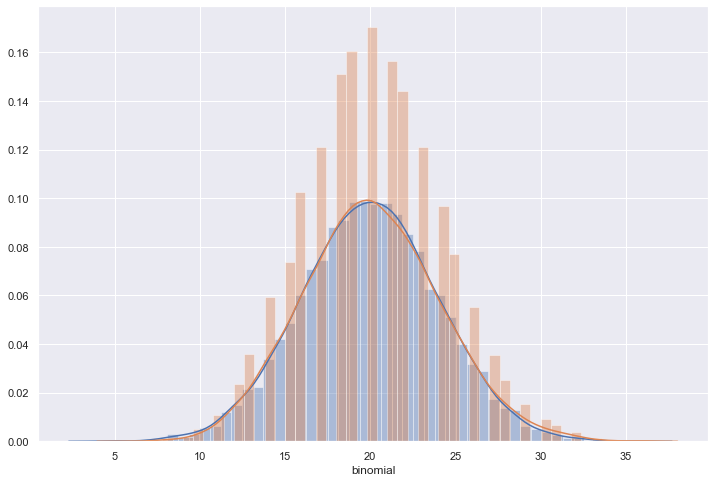

In [16]:
# Sua análise da parte 1 começa aqui.
sns.distplot(dataframe.normal)
sns.distplot(dataframe.binomial)

In [17]:
dataframe.describe().normal.loc['mean']

19.991456066526293

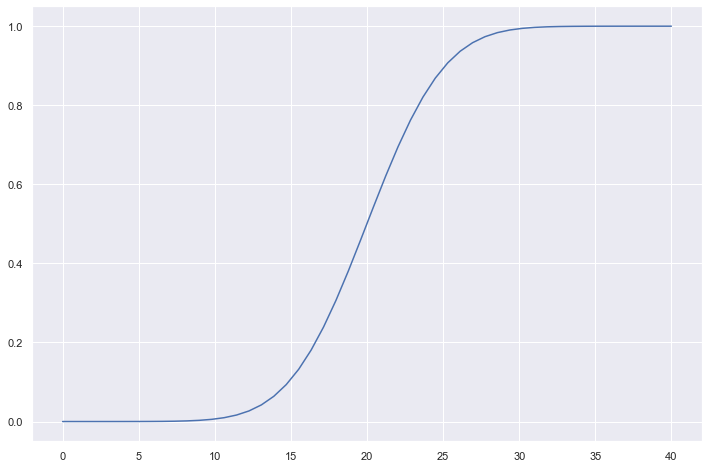

In [18]:
x = np.linspace(0,40)
f = lambda x: sct.norm.cdf(x,dataframe.describe().normal.loc['mean'],dataframe.describe().normal.loc['std'])
cdf = f(x)
sns.lineplot(x,cdf)


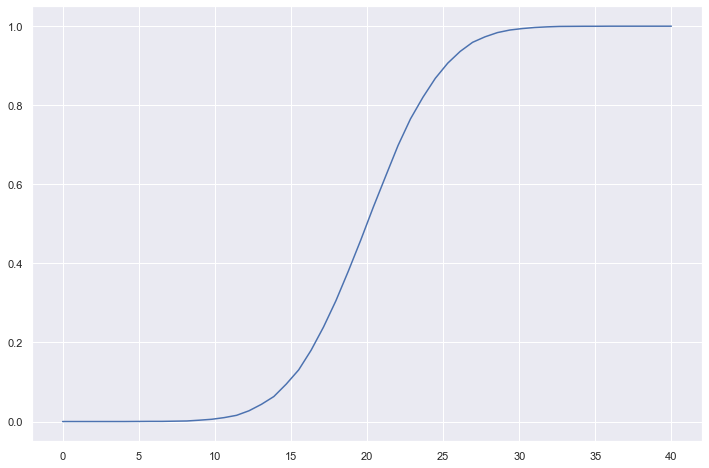

In [19]:
ecdf = ECDF(dataframe.normal)
sns.lineplot(x,ecdf(x))

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [20]:
def q1():
    quartis = ['25%','50%','75%']
    resultados = []
    for i in quartis:
        resultados.append(round(dataframe.describe().loc[i][0]-dataframe.describe().loc[i][1],3))
    return tuple(resultados)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [21]:
def q2():
    ecdf = ECDF(dataframe.normal)
    mean = dataframe.describe().normal.loc['mean']
    std = dataframe.describe().normal.loc['std']
    return float(round(ecdf(mean+std)-ecdf(mean-std),3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [38]:
def q3():
    mean_dif = round(dataframe.describe().loc['mean'][1]-dataframe.describe().loc['mean'][0],3)
    var_dif = round(float((dataframe.describe().loc['std'][1]))**2-float(dataframe.describe().loc['std'][0])**2,3)    
    return tuple([mean_dif,var_dif])

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [109]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [113]:
# Sua análise da parte 2 começa aqui.
stars.shape

(17897, 9)

In [135]:
filtered_mp = stars.mean_profile[stars.target == 0]
false_pulsar_mean_profile_standardized = (filtered_mp-filtered_mp.mean())/filtered_mp.std()
false_pulsar_mean_profile_standardized.describe()

count    1.625800e+04
mean     2.355656e-16
std      1.000000e+00
min     -5.685134e+00
25%     -6.471532e-01
50%      3.985947e-02
75%      6.706549e-01
max      4.352157e+00
Name: mean_profile, dtype: float64

In [137]:
sct.norm.ppf(0.75)

0.6744897501960817

In [140]:
false_pulsar_mean_profile_standardized.describe().loc['25%']

-0.647153176628595

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [3]:
def q4():
    ecdf1 = ECDF(false_pulsar_mean_profile_standardized) 
    ecdf_func= lambda x:ecdf1(sct.norm.ppf(x)) 
    return tuple([round(ecdf_func(0.8),3),round(ecdf_func(0.90),3),round(ecdf_func(0.95),3)])

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [142]:
def q5():
    get_stat = lambda x:false_pulsar_mean_profile_standardized.describe().loc[x]
    get_stat('25%')-sct.norm.ppf(0.25)
    return tuple([round(get_stat('25%')-sct.norm.ppf(0.25),3),
                  round(get_stat('50%')-sct.norm.ppf(0.50),3),
                  round(get_stat('75%')-sct.norm.ppf(0.75),3)])

(0.027336573567486755, 0.03985946669725165, -0.003834877783671753)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.